In [19]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.optimizers.experimental import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from matplotlib import pyplot as plt


In [20]:
import os
from PIL import Image

data_dir = "./dataset/"
train_data_dir= './dataset/train/'
test_data_dir= './dataset/test/'

img_width, img_height = 150, 150
channels = 3
batch_size = 32

In [21]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Scale pixel values to the range [0, 1]
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Load and preprocess the images using the generator
batch_size = 32  # Adjust the batch size according to your needs
rescale_size = (224,224)

train_data_gen = datagen.flow_from_directory(
    train_data_dir,
    target_size=rescale_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=True
)

Found 1689 images belonging to 2 classes.


In [22]:
test_data_gen = datagen.flow_from_directory(
    test_data_dir,
    target_size=rescale_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=True
)

Found 423 images belonging to 2 classes.


In [23]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu',input_shape=(224,224,3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 64)       

In [25]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)
es = EarlyStopping(monitor='val_accuracy', mode='max',restore_best_weights=True)

In [26]:
history = model.fit(
    train_data_gen,
    epochs=10
)

Epoch 1/10
53/53 [==============================] - 39s 701ms/step - loss: 0.8894 - accuracy: 0.5648
Epoch 2/10
53/53 [==============================] - 36s 684ms/step - loss: 0.6011 - accuracy: 0.6661
Epoch 3/10
53/53 [==============================] - 36s 683ms/step - loss: 0.5409 - accuracy: 0.7241
Epoch 4/10
53/53 [==============================] - 39s 732ms/step - loss: 0.5136 - accuracy: 0.7348
Epoch 5/10
53/53 [==============================] - 37s 704ms/step - loss: 0.4894 - accuracy: 0.7578
Epoch 6/10
53/53 [==============================] - 34s 640ms/step - loss: 0.4535 - accuracy: 0.7951
Epoch 7/10
53/53 [==============================] - 32s 604ms/step - loss: 0.4326 - accuracy: 0.7910
Epoch 8/10
53/53 [==============================] - 32s 593ms/step - loss: 0.4074 - accuracy: 0.8052
Epoch 9/10
53/53 [==============================] - 32s 603ms/step - loss: 0.3873 - accuracy: 0.8218
Epoch 10/10
53/53 [==============================] - 32s 599ms/step - loss: 0.3638 - accura

In [10]:
def _predict(model, path):
    img = np.array(Image.open(path).resize((224, 224)))
    plt.imshow(np.array(img))
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    print(pred[0])
    if pred[0] > 0.5:
        return 'normal'
    else:
        return 'cataract'

1/1 [==============================] - 0s 27ms/step
[1.]
normal


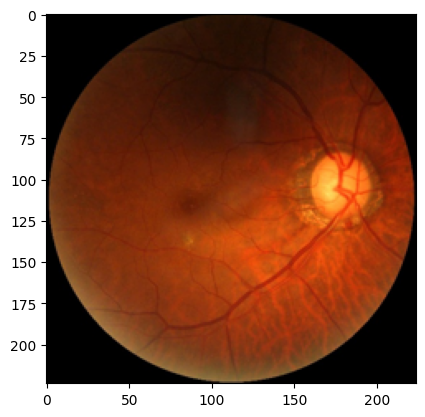

In [18]:
path = './dataset/test/normal/2466_right.jpg'
print(_predict(model,path))

1/1 [==============================] - 0s 26ms/step
[0.]
cataract


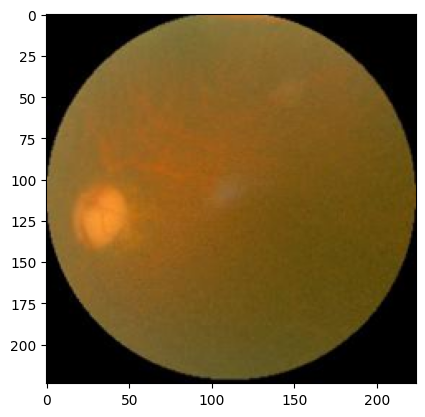

In [16]:
path = './dataset/test/cataract/_23_5187079.jpg'
print(_predict(model,path))

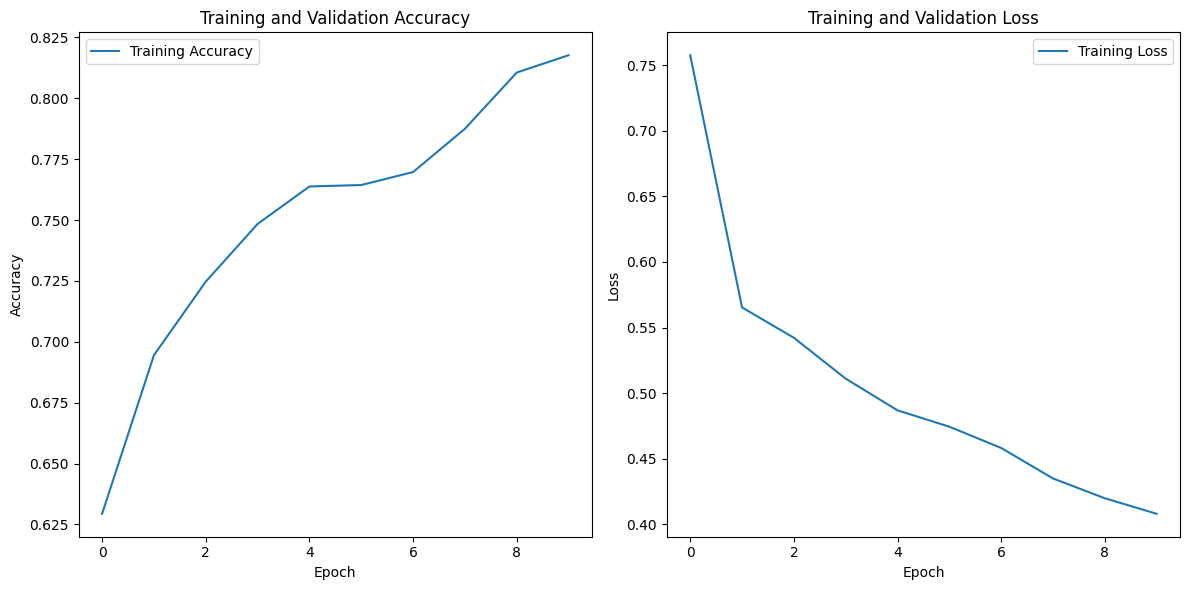

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the training history stored in a variable called 'history'
# history = model.fit(...)

# Create a pandas DataFrame from the training history
history_df = pd.DataFrame(history.history)

# Plot training and validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Training Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [70]:
model.save('classification.h5')